# N-arms bandit experiment simulation

## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Paramters

In [1]:
STEPS = 500
RUNS = 2000
epsilons = [0, 0.01, 0.1]

## Simulation function

In [2]:
def simulation(eps, steps = STEPS, runs= RUNS):
    rewards = np.zeros(steps)
    
    for _ in range(runs):
        Q = [0] * 10
        N = [0] * 10
        q = np.random.normal(loc=0, scale=1, size=10)
        for step in range(steps):
            if np.random.rand() < eps:
                action = np.random.randint(10)
            else:
                action = np.argmax(Q)
            reward = q[action] + np.random.rand()
            rewards[step] += reward
            N[action] += 1
            Q[action] += (reward - Q[action])/N[action]
    average_rewards = rewards / runs
    return average_rewards
    

## Visual plotting

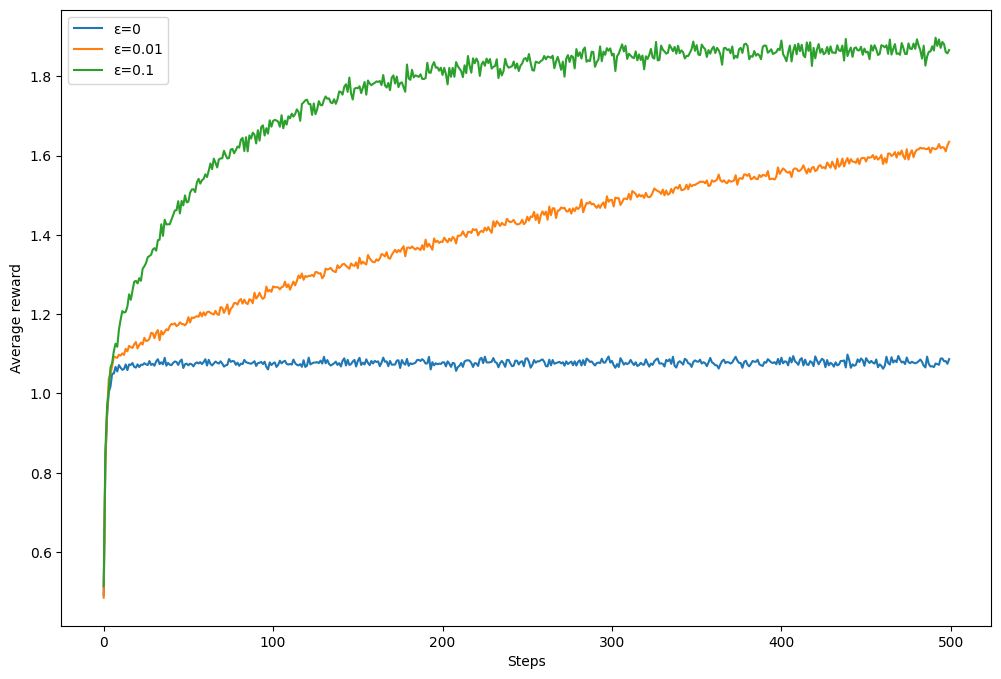

In [5]:
plt.figure(figsize=(12, 8))
for eps in epsilons:
    plt.plot(simulation(eps=eps, steps=500), label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()